For this notebook install the library pca in your environment

# PCA for Decathlon Athletes


<div class="alert alert-block alert-success">
<b>Goals:</b> 

* Demonstrate PCA.
* Show technical aspects.
* Observe the mathematics.
* See options for interpretation.
* This notebook is a mix of technical demo and analysis and presentation of results.
</div>
<div class="alert alert-block alert-warning">
<b>Content:</b> In this notebook, we mix the demo of a usecase (decathlon) and discussion of mathematical properties of PCA. The latter is for a deeper understanding of the theory. In a real usecase for a customer, we would not discuss the math in such detail!
</div>

<div class="alert alert-block alert-info">
<b>Content:</b> In this notebook, we 
    
* demonstrate the use of PCA,
* observe some of the properties,
* use resulting objects (matrices) to understand the transformation process.
</div>



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Load the Data

In [3]:
df=pd.read_csv('decathlon_data.csv')
print(df.shape)
df

(16, 13)


,position,athlete,country,m100,longjump,shotput,highjump,m400,hurdles,discus,polevault,javelin,m1500
0,1,Niklas Kaul (GER),GER,11.27,7.19,15.10,2.02,48.48,14.64,49.20,5.0,79.05,255.70
1,2,Maicel Uibo (EST),EST,11.10,7.46,15.12,2.17,50.44,14.43,46.64,5.4,63.83,271.51
2,3,Damian Warner (CAN),CAN,10.35,7.67,15.17,2.02,48.12,13.56,42.19,4.7,62.87,280.77
3,4,Ilya Shkurenyov (ANA),ANA,11.02,7.61,14.71,2.11,49.36,14.28,48.75,5.2,59.56,281.95
4,5,Pierce Lepage (CAN),CAN,10.36,7.79,13.21,2.05,47.35,14.19,41.19,5.2,57.42,285.09
5,6,Janek Õiglane (EST),EST,10.94,7.32,15.20,1.96,49.14,15.13,43.37,5.0,72.46,276.24
6,7,Pieter Braun (NED),NED,11.16,7.47,15.26,2.02,48.79,14.59,45.59,4.8,59.84,275.62
7,8,Solomon Simmons (USA),USA,10.70,7.37,15.33,1.96,49.31,14.10,46.26,4.8,53.25,284.17
8,9,Thomas Van (BEL),BEL,11.38,7.20,13.78,2.08,50.89,14.80,46.17,5.3,63.67,283.95
9,10,Tim Nowak (GER),GER,11.12,7.07,14.69,2.02,49.60,14.60,45.02,4.9,56.76,262.18


* athlete names can serve as index
* use only features from the sports competition

In [4]:
df=df.set_index('athlete')
positions = df['position']
df=df.drop(['country', 'position'], axis=1)
df

,m100,longjump,shotput,highjump,m400,hurdles,discus,polevault,javelin,m1500
athlete,,,,,,,,,,
Niklas Kaul (GER),11.27,7.19,15.10,2.02,48.48,14.64,49.20,5.0,79.05,255.70
Maicel Uibo (EST),11.10,7.46,15.12,2.17,50.44,14.43,46.64,5.4,63.83,271.51
Damian Warner (CAN),10.35,7.67,15.17,2.02,48.12,13.56,42.19,4.7,62.87,280.77
Ilya Shkurenyov (ANA),11.02,7.61,14.71,2.11,49.36,14.28,48.75,5.2,59.56,281.95
Pierce Lepage (CAN),10.36,7.79,13.21,2.05,47.35,14.19,41.19,5.2,57.42,285.09
Janek Õiglane (EST),10.94,7.32,15.20,1.96,49.14,15.13,43.37,5.0,72.46,276.24
Pieter Braun (NED),11.16,7.47,15.26,2.02,48.79,14.59,45.59,4.8,59.84,275.62
Solomon Simmons (USA),10.70,7.37,15.33,1.96,49.31,14.10,46.26,4.8,53.25,284.17
Thomas Van (BEL),11.38,7.20,13.78,2.08,50.89,14.80,46.17,5.3,63.67,283.95


## Scaling
* Centering and Scaling are useful prerequisits for PCA

In [5]:
scaler = StandardScaler()
 
df_sc = scaler.fit_transform(df)
print(type(df_sc))
df_sc = pd.DataFrame(df_sc, index=df.index, columns=df.columns)
df_sc.round(2)

<class 'numpy.ndarray'>


,m100,longjump,shotput,highjump,m400,hurdles,discus,polevault,javelin,m1500
athlete,,,,,,,,,,
Niklas Kaul (GER),1.03,-0.25,0.68,0.11,-0.63,0.34,1.61,0.32,2.65,-2.55
Maicel Uibo (EST),0.49,0.68,0.70,2.36,1.16,-0.19,0.50,2.01,0.47,-0.71
Damian Warner (CAN),-1.93,1.41,0.76,0.11,-0.96,-2.37,-1.44,-0.95,0.33,0.37
Ilya Shkurenyov (ANA),0.23,1.20,0.22,1.46,0.17,-0.56,1.42,1.17,-0.14,0.50
Pierce Lepage (CAN),-1.90,1.82,-1.57,0.56,-1.67,-0.79,-1.87,1.17,-0.45,0.87
Janek Õiglane (EST),-0.03,0.20,0.80,-0.79,-0.03,1.57,-0.92,0.32,1.71,-0.16
Pieter Braun (NED),0.68,0.72,0.87,0.11,-0.35,0.22,0.04,-0.53,-0.10,-0.23
Solomon Simmons (USA),-0.80,0.37,0.95,-0.79,0.13,-1.01,0.33,-0.53,-1.05,0.76
Thomas Van (BEL),1.39,-0.22,-0.89,1.01,1.57,0.74,0.30,1.59,0.45,0.73


## Covariance Analysis of the Features

In [6]:
df_sc.cov().round(2)

,m100,longjump,shotput,highjump,m400,hurdles,discus,polevault,javelin,m1500
m100,1.07,-0.52,0.14,0.07,0.79,0.81,0.68,0.08,0.38,-0.23
longjump,-0.52,1.07,-0.08,0.59,-0.30,-0.58,-0.41,0.45,0.09,0.11
shotput,0.14,-0.08,1.07,-0.06,0.13,0.07,0.41,0.03,0.29,-0.24
highjump,0.07,0.59,-0.06,1.07,0.13,-0.32,0.02,0.85,0.24,-0.28
m400,0.79,-0.30,0.13,0.13,1.07,0.64,0.47,0.10,0.11,0.23
hurdles,0.81,-0.58,0.07,-0.32,0.64,1.07,0.36,-0.02,0.30,0.02
discus,0.68,-0.41,0.41,0.02,0.47,0.36,1.07,0.08,0.27,-0.19
polevault,0.08,0.45,0.03,0.85,0.10,-0.02,0.08,1.07,0.27,-0.19
javelin,0.38,0.09,0.29,0.24,0.11,0.30,0.27,0.27,1.07,-0.53
m1500,-0.23,0.11,-0.24,-0.28,0.23,0.02,-0.19,-0.19,-0.53,1.07


* We investigate 10-dimensional data
* We observe non-zero covariance between all features 
* Conclusion: Features are correlated, there is a smaller intrisic dimension (smaller than 10)

### Principal Component Analysis

In [7]:
pca=PCA() # we should rename this variable because below we are going to use a lib of the same name
pca_transformed=pca.fit_transform(df_sc)
df_pca=pd.DataFrame(pca_transformed, index=df.index)
df_pca.round(2)

,0,1,2,3,4,5,6,7,8,9
athlete,,,,,,,,,,
Niklas Kaul (GER),2.11,2.13,-2.74,-0.91,-0.04,-0.81,-0.54,0.10,-0.14,-0.13
Maicel Uibo (EST),0.66,3.29,0.88,0.64,-0.45,0.46,0.48,-0.29,-0.11,0.17
Damian Warner (CAN),-3.33,0.05,-1.15,1.01,0.94,-0.73,0.90,-0.61,0.13,-0.09
Ilya Shkurenyov (ANA),-0.11,1.92,0.97,1.27,-0.62,-0.65,-0.64,0.37,0.17,0.14
Pierce Lepage (CAN),-3.91,0.66,1.04,-0.90,0.62,0.36,-0.89,0.19,-0.03,0.07
Janek Õiglane (EST),0.83,0.28,-0.75,-0.67,2.26,0.79,-0.32,-0.02,-0.16,0.05
Pieter Braun (NED),0.22,0.19,-0.50,0.48,0.33,-0.07,0.43,1.02,0.60,0.05
Solomon Simmons (USA),-0.88,-1.03,-0.16,1.81,-0.12,-0.15,0.13,0.08,-0.37,-0.28
Thomas Van (BEL),1.62,1.31,2.26,-0.51,-0.01,0.07,-0.23,-0.49,0.14,-0.42


In [8]:
pca.get_covariance()

array([[ 1.06666667, -0.52109764,  0.13919334,  0.07124937,  0.78647034,
         0.81178645,  0.67772318,  0.08305589,  0.38476834, -0.23267779],
       [-0.52109764,  1.06666667, -0.07656503,  0.58850313, -0.30177092,
        -0.58381851, -0.41173703,  0.44982345,  0.0911366 ,  0.11460473],
       [ 0.13919334, -0.07656503,  1.06666667, -0.0645442 ,  0.12550831,
         0.07459612,  0.41200336,  0.02548473,  0.28584059, -0.24224716],
       [ 0.07124937,  0.58850313, -0.0645442 ,  1.06666667,  0.1327626 ,
        -0.32205106,  0.02191585,  0.85230488,  0.23570904, -0.27973319],
       [ 0.78647034, -0.30177092,  0.12550831,  0.1327626 ,  1.06666667,
         0.63570792,  0.46539037,  0.10062197,  0.11350178,  0.23290025],
       [ 0.81178645, -0.58381851,  0.07459612, -0.32205106,  0.63570792,
         1.06666667,  0.35668393, -0.02093771,  0.30216577,  0.0169367 ],
       [ 0.67772318, -0.41173703,  0.41200336,  0.02191585,  0.46539037,
         0.35668393,  1.06666667,  0.07696053

<div class="alert alert-block alert-warning">
<b>Observation:</b> The features are no longer interpretable in the context of the sports competitions.
</div>

In [9]:
df_pca.cov().round(2)

,0,1,2,3,4,5,6,7,8,9
0,3.54,-0.0,-0.00,-0.00,-0.00,-0.00,0.0,0.0,0.00,-0.00
1,-0.00,2.6,0.00,-0.00,0.00,-0.00,-0.0,0.0,0.00,-0.00
2,-0.00,0.0,1.54,-0.00,0.00,0.00,-0.0,-0.0,-0.00,0.00
3,-0.00,-0.0,-0.00,1.01,0.00,-0.00,0.0,0.0,0.00,-0.00
4,-0.00,0.0,0.00,0.00,0.75,-0.00,0.0,-0.0,-0.00,0.00
5,-0.00,-0.0,0.00,-0.00,-0.00,0.48,0.0,0.0,-0.00,-0.00
6,0.00,-0.0,-0.00,0.00,0.00,0.00,0.4,-0.0,0.00,0.00
7,0.00,0.0,-0.00,0.00,-0.00,0.00,-0.0,0.2,-0.00,0.00
8,0.00,0.0,-0.00,0.00,-0.00,-0.00,0.0,-0.0,0.09,0.00
9,-0.00,-0.0,0.00,-0.00,0.00,-0.00,0.0,0.0,0.00,0.04


<div class="alert alert-block alert-success">
<b>Observations:</b> 

* The transformed data shows no covariance, thus no correlation among different components
* The components are ordered by their variance (highest to lowest, see main diagonal)
    </div>


### Digression -- the Components of the Transformation.
Let's take a look a the transformation matrix to understand the transformation process mathematically. 

In [10]:
np.round(pca.components_,2) # the transformation matrix

array([[ 0.51, -0.35,  0.18, -0.08,  0.4 ,  0.45,  0.4 , -0.02,  0.22,
        -0.11],
       [ 0.09,  0.35,  0.11,  0.57,  0.03, -0.11,  0.1 ,  0.54,  0.35,
        -0.31],
       [ 0.14,  0.15, -0.42,  0.25,  0.45,  0.15, -0.09,  0.25, -0.32,
         0.56],
       [-0.14,  0.17,  0.71,  0.01,  0.18, -0.27,  0.38,  0.  , -0.26,
         0.36],
       [-0.09,  0.39,  0.25, -0.25,  0.1 ,  0.34, -0.41, -0.07,  0.56,
         0.33],
       [-0.11, -0.31,  0.38, -0.03, -0.09,  0.37, -0.45,  0.49, -0.38,
        -0.14],
       [ 0.17,  0.05,  0.18,  0.25,  0.5 , -0.22, -0.48, -0.45, -0.15,
        -0.34],
       [ 0.33,  0.65,  0.02, -0.14, -0.24,  0.35,  0.12, -0.13, -0.42,
        -0.24],
       [ 0.55, -0.17,  0.17,  0.39, -0.52, -0.07, -0.19, -0.18,  0.05,
         0.39],
       [-0.49, -0.06,  0.02,  0.56, -0.07,  0.51,  0.17, -0.39, -0.03,
         0.  ]])

In [12]:
X=df_sc.to_numpy() # our data as numpy array
W = pca.components_
manually_computed_trafo=np.transpose(np.matmul(W, np.transpose(X))) # this is the actual transformation (results are similar to df_pca)
np.round(manually_computed_trafo,2)

array([[ 2.11,  2.13, -2.74, -0.91, -0.04, -0.81, -0.54,  0.1 , -0.14,
        -0.13],
       [ 0.66,  3.29,  0.88,  0.64, -0.45,  0.46,  0.48, -0.29, -0.11,
         0.17],
       [-3.33,  0.05, -1.15,  1.01,  0.94, -0.73,  0.9 , -0.61,  0.13,
        -0.09],
       [-0.11,  1.92,  0.97,  1.27, -0.62, -0.65, -0.64,  0.37,  0.17,
         0.14],
       [-3.91,  0.66,  1.04, -0.9 ,  0.62,  0.36, -0.89,  0.19, -0.03,
         0.07],
       [ 0.83,  0.28, -0.75, -0.67,  2.26,  0.79, -0.32, -0.02, -0.16,
         0.05],
       [ 0.22,  0.19, -0.5 ,  0.48,  0.33, -0.07,  0.43,  1.02,  0.6 ,
         0.05],
       [-0.88, -1.03, -0.16,  1.81, -0.12, -0.15,  0.13,  0.08, -0.37,
        -0.28],
       [ 1.62,  1.31,  2.26, -0.51, -0.01,  0.07, -0.23, -0.49,  0.14,
        -0.42],
       [ 0.8 ,  0.17, -0.7 , -0.63, -0.96,  0.76,  1.1 ,  0.38, -0.39,
        -0.05],
       [-1.67, -0.75,  0.22, -1.83, -0.95, -1.26,  0.14, -0.23, -0.18,
         0.19],
       [ 0.51, -1.16, -0.19,  1.17, -0.28, 

In [13]:
np.array_equal(
    np.round(df_pca.to_numpy(),2),
    np.round(manually_computed_trafo, 2)
)

True

# What have we won yet?
* Our data still has 10 features, i.e. the dimensionality has not been reduced.
* Idea: Use the principal components with the highest variance.

[0.33211919 0.24337931 0.14444585 0.09501846 0.07055147 0.04529365
 0.0379652  0.01896612 0.00887375 0.00338701]
[0.33211919 0.5754985  0.71994435 0.81496281 0.88551428 0.93080793
 0.96877312 0.98773924 0.99661299 1.        ]


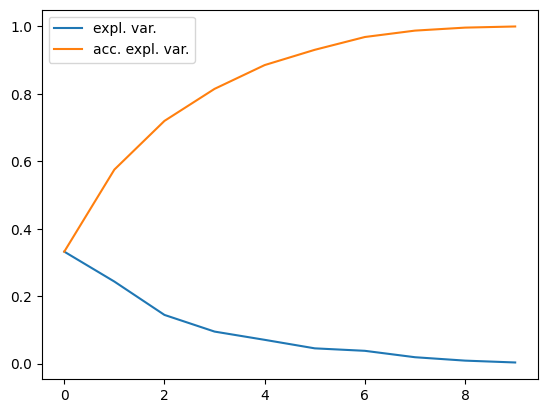

In [14]:
expl_var=pca.explained_variance_ratio_
print(expl_var)
plt.plot(expl_var, label='expl. var.')
plt.plot(np.add.accumulate(expl_var), label='acc. expl. var.')
plt.legend()
print(np.add.accumulate(expl_var))

* The first 4 principal components account for over 80% of the variance
* the first 2 already for 57% of the variance
* Let's plot the data in a 2-D plot using only the first two components

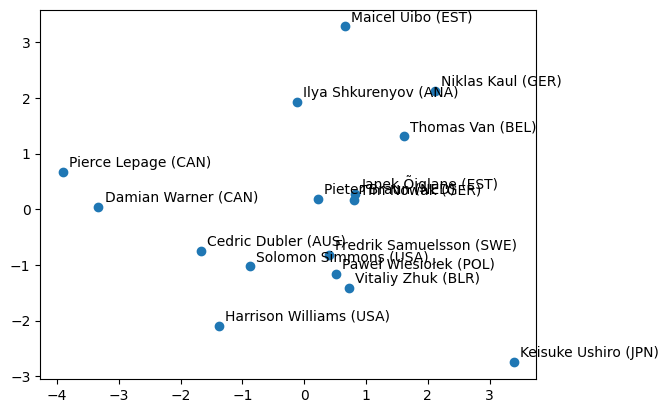

In [15]:
plt.scatter(df_pca.iloc[:,0],df_pca.iloc[:,1])
for i in range(len(df_pca)):
    plt.annotate(df_pca.index[i], (df_pca.iloc[i,0]+0.1, df_pca.iloc[i,1]+0.1))

### For Specific Tasks, there are Specific Libs

In [19]:
from pca import pca

In [20]:
#model = pca(n_components=0.8)
model = pca(n_components=4)

# Fit transform
results = model.fit_transform(df_sc)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


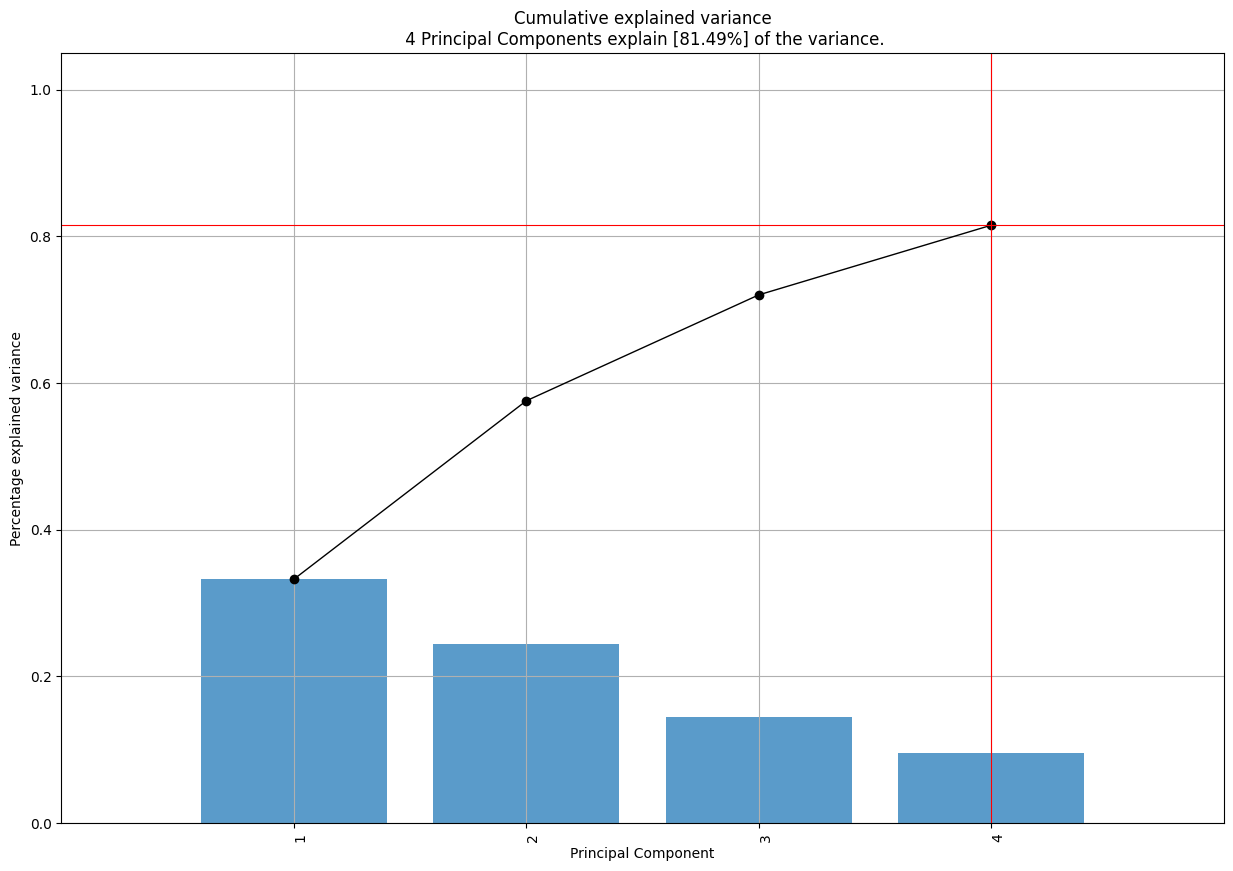

In [21]:
# explained variance
fig, ax = model.plot()

[scatterd] >INFO> Create scatterplot


[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


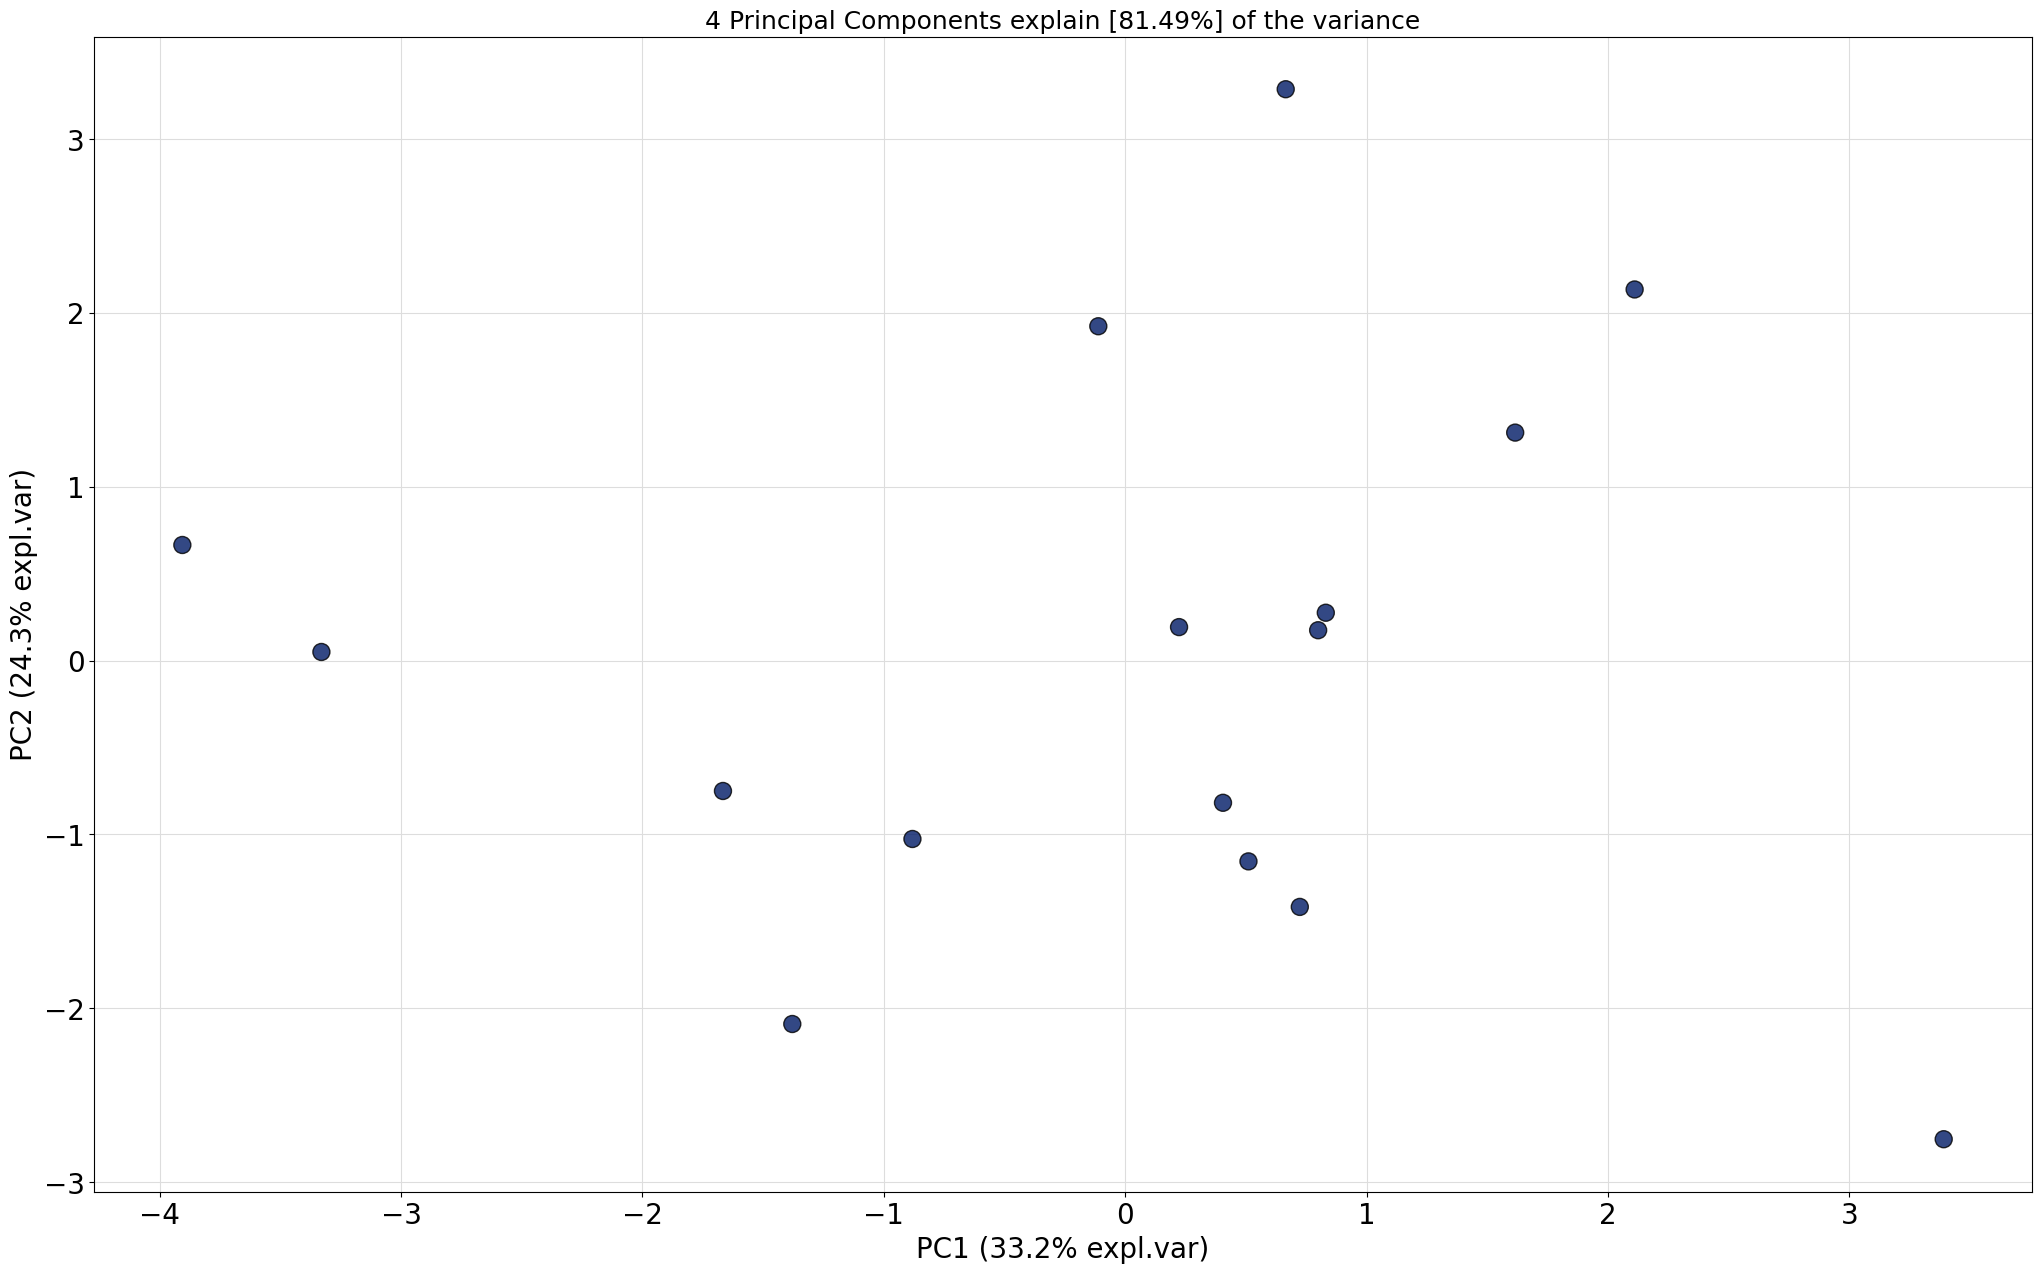

In [22]:
# Scatter first 2 PCs (2 and 3)
fig, ax = model.scatter(legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


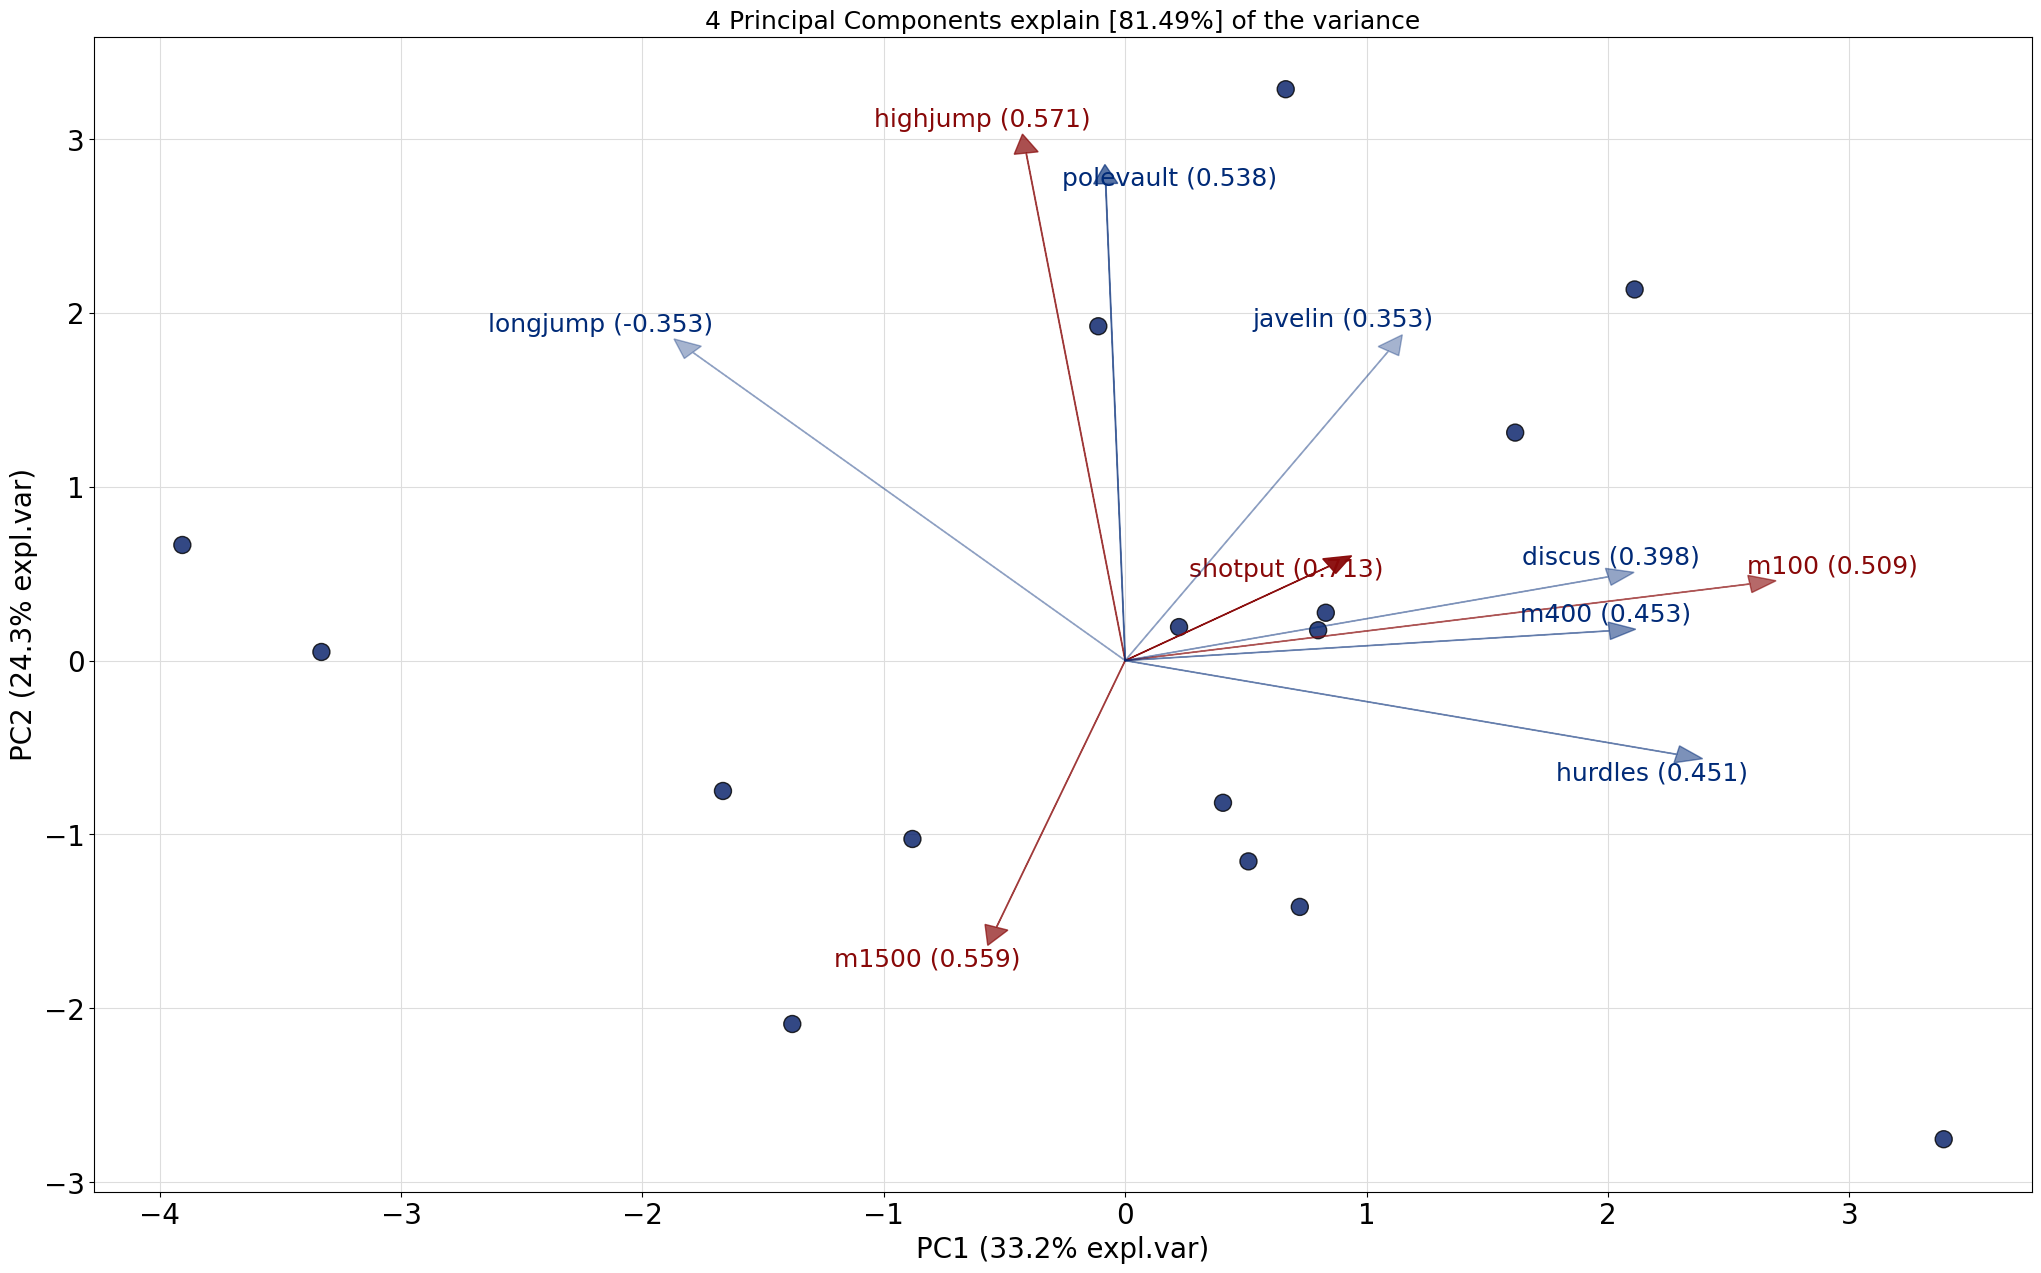

In [23]:
# biplot with number of original features (plot data and loadings)
fig, ax = model.biplot(n_feat=10, legend=False) #, PC=[2,3]) # use this to display compontens 3 and 4

* annotated are the highest (absolute value) loadings (the weight for the component a feature influences the most)
* red arrows indicate features that are the ones most important for a particular component
* angles between loading vectors indicate correlation: small angles -> high correlation, angles near 90 degrees -> low correlation
* length of the vector indicates the strength of the feature with respect to the currently choosen components (e.g. highjump with 0.08 and 0.57 (long) vs. shotput with 0.18 and 0.11 (short)); vectors are scaled vor better readability

In [24]:
model.results['loadings'].round(2)

,m100,longjump,shotput,highjump,m400,hurdles,discus,polevault,javelin,m1500
PC1,0.51,-0.35,0.18,-0.08,0.40,0.45,0.40,-0.02,0.22,-0.11
PC2,0.09,0.35,0.11,0.57,0.03,-0.11,0.10,0.54,0.35,-0.31
PC3,0.14,0.15,-0.42,0.25,0.45,0.15,-0.09,0.25,-0.32,0.56
PC4,-0.14,0.17,0.71,0.01,0.18,-0.27,0.38,0.00,-0.26,0.36


In [25]:
model.results['PC']

,PC1,PC2,PC3,PC4
Niklas Kaul (GER),2.110326,2.134559,-2.737969,-0.912882
Maicel Uibo (EST),0.664920,3.286348,0.877582,0.639793
Damian Warner (CAN),-3.329757,0.049341,-1.153762,1.014379
Ilya Shkurenyov (ANA),-0.111422,1.922953,0.967993,1.272544
Pierce Lepage (CAN),-3.905790,0.664729,1.043570,-0.898930
Janek Õiglane (EST),0.830955,0.275047,-0.753823,-0.674046
Pieter Braun (NED),0.223066,0.192457,-0.501777,0.480457
Solomon Simmons (USA),-0.881374,-1.026358,-0.156688,1.813227
Thomas Van (BEL),1.615518,1.311171,2.255058,-0.507052
Tim Nowak (GER),0.799250,0.174409,-0.700774,-0.633243


In [26]:
model.results['explained_var']

array([0.33211919, 0.5754985 , 0.71994435, 0.81496281])

## Clustering / Predictions ...
* use the PCA-transformed dataset as input for further analyses (clustering, classification, regression, ...)
* gain: 
    * lower dimensionality -> faster training
    * un-correlated features -> fits assumptions of algorithms better
* loss: 
    * interpretability (features are now mixed into the principal components)

<div class="alert alert-block alert-info">
<b>Take Aways:</b> 

* PCA uses a matrix multiplication to transform the data. This matrix is learned when fitting the data.
* The resulting components are ordered by the amount of variance they explain.
* Biplots show the connections between data and features.
* In a preprocessing step, the data scientist selects a reasonable number of dimensions, e.g. by using all components that exceed a variance threshold individually or by using the first $k$ components such that their accumulated explained variance exceeds a reasonable threshold.
</div>

<div class="alert alert-block alert-warning">
<b>Note:</b>
    
* The features are no longer interpretable in the original context of the domain.
* For example for clusterings on PCA-transformed data this means that the interpretation of the clustering should be conducted on the original data!
</div>


<div class="alert alert-block alert-success">
<b>Play with:</b> 

* Choose different numbers of components and plot the biplot.
* Go through the biplot and find the respective components in the loadings.
* Use PCA on the Iris dataset and observe the loadings.
* Combine PCA and clustering by first transforming the data using PCA and then applying the clustering to the transformed data.
</div>